<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Wrangling-with-Pandas" data-toc-modified-id="Data-Wrangling-with-Pandas-1">Data Wrangling with Pandas</a></span><ul class="toc-item"><li><span><a href="#Date/Time-data-handling" data-toc-modified-id="Date/Time-data-handling-1.1">Date/Time data handling</a></span></li><li><span><a href="#Merging-and-joining-DataFrame-objects" data-toc-modified-id="Merging-and-joining-DataFrame-objects-1.2">Merging and joining DataFrame objects</a></span><ul class="toc-item"><li><span><a href="#Exercise-6" data-toc-modified-id="Exercise-6-1.2.1">Exercise 6</a></span></li></ul></li><li><span><a href="#Concatenation" data-toc-modified-id="Concatenation-1.3">Concatenation</a></span></li><li><span><a href="#Reshaping-DataFrame-objects" data-toc-modified-id="Reshaping-DataFrame-objects-1.4">Reshaping DataFrame objects</a></span></li><li><span><a href="#Pivoting" data-toc-modified-id="Pivoting-1.5">Pivoting</a></span></li><li><span><a href="#Data-transformation" data-toc-modified-id="Data-transformation-1.6">Data transformation</a></span><ul class="toc-item"><li><span><a href="#Dealing-with-duplicates" data-toc-modified-id="Dealing-with-duplicates-1.6.1">Dealing with duplicates</a></span></li><li><span><a href="#Value-replacement" data-toc-modified-id="Value-replacement-1.6.2">Value replacement</a></span></li><li><span><a href="#Inidcator-variables" data-toc-modified-id="Inidcator-variables-1.6.3">Inidcator variables</a></span></li></ul></li><li><span><a href="#Categorical-Data" data-toc-modified-id="Categorical-Data-1.7">Categorical Data</a></span><ul class="toc-item"><li><span><a href="#Discretization" data-toc-modified-id="Discretization-1.7.1">Discretization</a></span></li><li><span><a href="#Permutation-and-sampling" data-toc-modified-id="Permutation-and-sampling-1.7.2">Permutation and sampling</a></span></li></ul></li><li><span><a href="#Data-aggregation-and-GroupBy-operations" data-toc-modified-id="Data-aggregation-and-GroupBy-operations-1.8">Data aggregation and GroupBy operations</a></span><ul class="toc-item"><li><span><a href="#Apply" data-toc-modified-id="Apply-1.8.1">Apply</a></span></li></ul></li><li><span><a href="#References" data-toc-modified-id="References-1.9">References</a></span></li></ul></li></ul></div>

# Data Wrangling with Pandas

Now that we have been exposed to the basic functionality of Pandas, let's explore some more advanced features that will be useful when addressing more complex data management tasks.

As most statisticians/data analysts will admit, often the lion's share of the time spent implementing an analysis is devoted to preparing the data itself, rather than to coding or running a particular model that uses the data. This is where Pandas and  Python's standard library are beneficial, providing high-level, flexible, and efficient tools for manipulating your data as needed.


In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook')

## Date/Time data handling

Date and time data are inherently problematic. There are an unequal number of days in every month, an unequal number of days in a year (due to leap years), and time zones that vary over space. Yet information about time is essential in many analyses, particularly in the case of time series analysis.

The `datetime` built-in library handles temporal information down to the nanosecond.

In [2]:
from datetime import datetime, date, time

In [3]:
now = datetime.now()
now

datetime.datetime(2024, 9, 28, 13, 25, 5, 636436)

In [4]:
date(1970, 9, 3)

datetime.date(1970, 9, 3)

Having a custom data type for dates and times is convenient because we can perform operations on them easily. For example, we may want to calculate the difference between two times:

In [5]:
my_age = now - datetime(1970, 1, 1)
my_age.days/365

54.778082191780825

In this section, we will manipulate data collected from ocean-going vessels on the eastern seaboard. Vessel operations are monitored using the Automatic Identification System (AIS), a safety at sea navigation technology which vessels are required to maintain and that uses transponders to transmit very high frequency (VHF) radio signals containing static information including ship name, call sign, and country of origin, as well as dynamic information unique to a particular voyage such as vessel location, heading, and speed. 

The International Maritime Organization’s (IMO) International Convention for the Safety of Life at Sea requires functioning AIS capabilities on all vessels 300 gross tons or greater and the US Coast Guard requires AIS on nearly all vessels sailing in U.S. waters. The Coast Guard has established a national network of AIS receivers that provides coverage of nearly all U.S. waters. AIS signals are transmitted several times each minute and the network is capable of handling thousands of reports per minute and updates as often as every two seconds. Therefore, a typical voyage in our study might include the transmission of hundreds or thousands of AIS encoded signals. This provides a rich source of spatial data that includes both spatial and temporal information.

For our purposes, we will use summarized data that describes the transit of a given vessel through a particular administrative area. The data includes the start and end time of the transit segment, as well as information about the speed of the vessel, how far it travelled, etc.

In [6]:
segments = pd.read_csv("Data/transit_segments.csv")
segments.head()

,mmsi,name,transit,segment,seg_length,avg_sog,min_sog,max_sog,pdgt10,st_time,end_time
0,1,Us Govt Ves,1,1,5.1,13.2,9.2,14.5,96.5,2/10/09 16:03,2/10/09 16:27
1,1,Dredge Capt Frank,1,1,13.5,18.6,10.4,20.6,100.0,4/6/09 14:31,4/6/09 15:20
2,1,Us Gov Vessel,1,1,4.3,16.2,10.3,20.5,100.0,4/6/09 14:36,4/6/09 14:55
3,1,Us Gov Vessel,2,1,9.2,15.4,14.5,16.1,100.0,4/10/09 17:58,4/10/09 18:34
4,1,Dredge Capt Frank,2,1,9.2,15.4,14.6,16.2,100.0,4/10/09 17:59,4/10/09 18:35


For example, we might be interested in the distribution of transit lengths, so we can plot them as a histogram:

<Axes: >

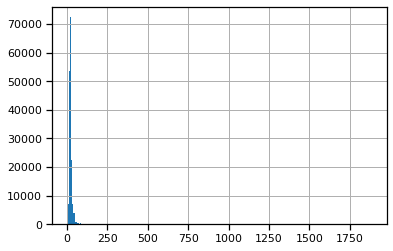

In [7]:
segments.seg_length.hist(bins=500)

Though most of the transits appear to be short, there are a few longer distances that make the plot difficult to read. This is where a transformation is useful:

<Axes: >

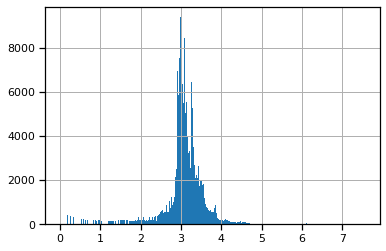

In [8]:
segments.seg_length.apply(np.log).hist(bins=500)

We can see that although there are date/time fields in the dataset, they are not in any specialized format, such as `datetime`.

Our first order of business will be to convert these data to `datetime`. The `strptime` method parses a string representation of a date and/or time field, according to the expected format of this information.

In [9]:
datetime.strptime(segments.st_time.iloc[0], '%m/%d/%y %H:%M') # datetime is library. It's strptime() func here is only applied on 1st row of 'st_time' col (selected via iloc[0]) of segments df to give you an idea

datetime.datetime(2009, 2, 10, 16, 3)

The `dateutil` package includes a parser that attempts to detect the format of the date strings, and convert them automatically.

In [10]:
from dateutil.parser import parse

In [11]:
parse(segments.st_time.iloc[0]) # just to test, applied on 1st value of st_time col

datetime.datetime(2009, 2, 10, 16, 3)

We can convert all the dates in a particular column by using the `apply` method.

In [12]:
segments.st_time.apply(lambda d: datetime.strptime(d, '%m/%d/%y %H:%M')).head(10) # you can use .apply() on both a col i-e Series and also dataframe. Here, 'd' is each row value of col 'st_time'

0   2009-02-10 16:03:00
1   2009-04-06 14:31:00
2   2009-04-06 14:36:00
3   2009-04-10 17:58:00
4   2009-04-10 17:59:00
5   2010-03-20 16:06:00
6   2010-03-20 18:05:00
7   2011-05-04 11:28:00
8   2010-06-05 11:23:00
9   2010-06-08 11:03:00
Name: st_time, dtype: datetime64[ns]

As a convenience, Pandas has a `to_datetime` method that will parse and convert an entire `Series` of formatted strings into `datetime` objects.

In [13]:
pd.to_datetime(segments.st_time[:10], format='%m/%d/%y %H:%M') # for showing, it converts first 10 rows of 'st_time' col of segments df

0   2009-02-10 16:03:00
1   2009-04-06 14:31:00
2   2009-04-06 14:36:00
3   2009-04-10 17:58:00
4   2009-04-10 17:59:00
5   2010-03-20 16:06:00
6   2010-03-20 18:05:00
7   2011-05-04 11:28:00
8   2010-06-05 11:23:00
9   2010-06-08 11:03:00
Name: st_time, dtype: datetime64[ns]

Pandas also has a custom NA value for missing datetime objects, `NaT`.

In [14]:
pd.to_datetime([None])

DatetimeIndex(['NaT'], dtype='datetime64[ns]', freq=None)

Also, if `to_datetime()` has problems parsing any particular date/time format, you can pass the spec in using the `format=` argument.

The `read_*` functions now have an optional `parse_dates` argument that try to convert any columns passed to it into `datetime` format upon import:

In [15]:
segments = pd.read_csv("Data/transit_segments.csv", parse_dates=['st_time', 'end_time'], date_format='%m/%d/%y %H:%M', nrows=1000) # to parse date cols directly while importing csv to df

In [16]:
segments.dtypes

mmsi                   int64
name                  object
transit                int64
segment                int64
seg_length           float64
avg_sog              float64
min_sog              float64
max_sog              float64
pdgt10               float64
st_time       datetime64[ns]
end_time      datetime64[ns]
dtype: object

Columns of the `datetime` type have an **accessor** to easily extract properties of the data type. This will return a `Series`, with the same row index as the `DataFrame`. For example:

In [17]:
segments.st_time.dt.month.head() # .dt.month --> returns month of dates

0    2
1    4
2    4
3    4
4    4
Name: st_time, dtype: int32

This can be used to easily filter rows by particular temporal attributes:

In [18]:
segments[segments.st_time.dt.month==2].head()

,mmsi,name,transit,segment,seg_length,avg_sog,min_sog,max_sog,pdgt10,st_time,end_time
0,1,Us Govt Ves,1,1,5.1,13.2,9.2,14.5,96.5,2009-02-10 16:03:00,2009-02-10 16:27:00
78,3011,Charleston,16,1,18.9,0.3,0.0,16.1,0.5,2010-02-07 07:26:00,2010-02-09 19:27:00
79,3011,Charleston,17,1,19.2,0.3,0.0,6.4,0.0,2010-02-11 16:56:00,2010-02-14 14:31:00
80,3011,Charleston,18,1,24.7,0.3,0.0,5.7,0.0,2010-02-19 11:53:00,2010-02-22 16:50:00
81,3011,Charleston,19,1,40.1,0.4,0.0,16.3,0.1,2010-02-23 15:15:00,2010-03-02 14:25:00


## Merging and joining DataFrame objects

##### Info regarding DFs ('segment' and 'vessels'):
**segments df:**\
    - contains info about journey/segment/transit of vessels/ships\
    - it includes name of vessels, segment length, st_time (start time), end_time, etc

**vessels df:**\
    - contains info regrading properties of each vessel/ship itself\
    - it includes name of vessel, flag, type, etc

Now that we have the vessel transit information as we need it, we may want a little more information regarding the vessels themselves. In the `data/AIS` folder there is a second table that contains information about each of the ships that traveled the segments in the `segments` table.

In [19]:
vessels = pd.read_csv("Data/vessel_information.csv", index_col='mmsi')
vessels.head()

,num_names,names,sov,flag,flag_type,num_loas,loa,max_loa,num_types,type
mmsi,,,,,,,,,,
1,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing
9,3,000000009/Raven/Shearwater,N,Unknown,Unknown,2,50.0/62.0,62.0,2,Pleasure/Tug
21,1,Us Gov Vessel,Y,Unknown,Unknown,1,208.0,208.0,1,Unknown
74,2,Mcfaul/Sarah Bell,N,Unknown,Unknown,1,155.0,155.0,1,Unknown
103,3,Ron G/Us Navy Warship 103/Us Warship 103,Y,Unknown,Unknown,2,26.0/155.0,155.0,2,Tanker/Unknown


The challenge is that several ships have travelled multiple segments, so there is not a one-to-one relationship between the rows of the two tables. **The table of vessel information has a *one-to-many* relationship with the segments**.

In Pandas, we can combine tables according to the value of one or more *keys* that are used to identify rows, much like an index. Using a trivial example:

In [20]:
# just an example, not related to our dfs
'''
dict( id=range(4), age=np.random.randint(18, 31, size=4 ) -->  creates dict of id:age , where id is from 0 to 3, age is 4 rand values (b/w 18 & 31) 
'''
df1 = pd.DataFrame( dict(id=range(4), age=np.random.randint(18, 31, size=4)) )
df2 = pd.DataFrame(dict(id=list(range(3))+list(range(3)), 
                        score=np.random.random(size=6)))
print("df1:")
df1.head()

df1:


,id,age
0,0,21
1,1,29
2,2,20
3,3,30


In [21]:
print("df2:")
df2

df2:


,id,score
0,0,0.105999
1,1,0.389594
2,2,0.933945
3,0,0.337895
4,1,0.056565
5,2,0.041122


In [22]:
pd.merge(df1, df2)

,id,age,score
0,0,21,0.105999
1,0,21,0.337895
2,1,29,0.389594
3,1,29,0.056565
4,2,20,0.933945
5,2,20,0.041122


Notice that without any information about which column to use as a key, Pandas did the right thing and used the `id` column in both tables. Unless specified otherwise, `merge` will used any common column names as keys for merging the tables. 

Notice also that `id=3` from `df1` was omitted from the merged table. This is because, by default, `merge` performs an **inner join** on the tables, meaning that the merged table represents an intersection of the two tables.

In [23]:
pd.merge(df1, df2, how='outer') 

,id,age,score
0,0,21,0.105999
1,0,21,0.337895
2,1,29,0.389594
3,1,29,0.056565
4,2,20,0.933945
5,2,20,0.041122
6,3,30,NaN


The **outer join** above yields the union of the two tables, so all rows are represented, with missing values inserted as appropriate. One can also perform **right** and **left** joins to include all rows of the right or left table (*i.e.* first or second argument to `merge`), but not necessarily the other.

Looking at the two datasets that we wish to merge:

In [24]:
segments.head(1)

,mmsi,name,transit,segment,seg_length,avg_sog,min_sog,max_sog,pdgt10,st_time,end_time
0,1,Us Govt Ves,1,1,5.1,13.2,9.2,14.5,96.5,2009-02-10 16:03:00,2009-02-10 16:27:00


In [25]:
vessels.head(1)

,num_names,names,sov,flag,flag_type,num_loas,loa,max_loa,num_types,type
mmsi,,,,,,,,,,
1,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing


we see that there is a `mmsi` value (a vessel identifier) in each table, but it is used as an index for the `vessels` table. In this case, we have to specify to join on the index for this table, and on the `mmsi` column for the other.

In [26]:
segments_merged = pd.merge(vessels, segments, left_index=True, right_on='mmsi')

In [27]:
segments_merged.head()

,num_names,names,sov,flag,flag_type,num_loas,loa,max_loa,num_types,type,...,name,transit,segment,seg_length,avg_sog,min_sog,max_sog,pdgt10,st_time,end_time
0,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing,...,Us Govt Ves,1,1,5.1,13.2,9.2,14.5,96.5,2009-02-10 16:03:00,2009-02-10 16:27:00
1,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing,...,Dredge Capt Frank,1,1,13.5,18.6,10.4,20.6,100.0,2009-04-06 14:31:00,2009-04-06 15:20:00
2,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing,...,Us Gov Vessel,1,1,4.3,16.2,10.3,20.5,100.0,2009-04-06 14:36:00,2009-04-06 14:55:00
3,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing,...,Us Gov Vessel,2,1,9.2,15.4,14.5,16.1,100.0,2009-04-10 17:58:00,2009-04-10 18:34:00
4,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing,...,Dredge Capt Frank,2,1,9.2,15.4,14.6,16.2,100.0,2009-04-10 17:59:00,2009-04-10 18:35:00


In this case, the default inner join is suitable; we are not interested in observations from either table that do not have corresponding entries in the other. 

Notice that `mmsi` field that was an index on the `vessels` table is no longer an index on the merged table.

Here, we used the `merge` function to perform the merge; we could also have used the `merge` *method* for either of the tables:

In [28]:
vessels.merge(segments, left_index=True, right_on='mmsi').head()

,num_names,names,sov,flag,flag_type,num_loas,loa,max_loa,num_types,type,...,name,transit,segment,seg_length,avg_sog,min_sog,max_sog,pdgt10,st_time,end_time
0,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing,...,Us Govt Ves,1,1,5.1,13.2,9.2,14.5,96.5,2009-02-10 16:03:00,2009-02-10 16:27:00
1,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing,...,Dredge Capt Frank,1,1,13.5,18.6,10.4,20.6,100.0,2009-04-06 14:31:00,2009-04-06 15:20:00
2,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing,...,Us Gov Vessel,1,1,4.3,16.2,10.3,20.5,100.0,2009-04-06 14:36:00,2009-04-06 14:55:00
3,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing,...,Us Gov Vessel,2,1,9.2,15.4,14.5,16.1,100.0,2009-04-10 17:58:00,2009-04-10 18:34:00
4,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing,...,Dredge Capt Frank,2,1,9.2,15.4,14.6,16.2,100.0,2009-04-10 17:59:00,2009-04-10 18:35:00


Occasionally, there will be fields with the same in both tables that we do not wish to use to join the tables; they may contain different information, despite having the same name. In this case, Pandas will by default append suffixes `_x` and `_y` to the columns to uniquely identify them.

In [29]:
segments['type'] = 'foo'
pd.merge(vessels, segments, left_index=True, right_on='mmsi').head()

,num_names,names,sov,flag,flag_type,num_loas,loa,max_loa,num_types,type_x,...,transit,segment,seg_length,avg_sog,min_sog,max_sog,pdgt10,st_time,end_time,type_y
0,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing,...,1,1,5.1,13.2,9.2,14.5,96.5,2009-02-10 16:03:00,2009-02-10 16:27:00,foo
1,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing,...,1,1,13.5,18.6,10.4,20.6,100.0,2009-04-06 14:31:00,2009-04-06 15:20:00,foo
2,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing,...,1,1,4.3,16.2,10.3,20.5,100.0,2009-04-06 14:36:00,2009-04-06 14:55:00,foo
3,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing,...,2,1,9.2,15.4,14.5,16.1,100.0,2009-04-10 17:58:00,2009-04-10 18:34:00,foo
4,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing,...,2,1,9.2,15.4,14.6,16.2,100.0,2009-04-10 17:59:00,2009-04-10 18:35:00,foo


This behavior can be overridden by specifying a `suffixes` argument, containing a list of the suffixes to be used for the columns of the left and right columns, respectively.

### Exercise 6
Fix the following `merge` in order to return a non-empty `DataFrame`.

In [39]:
segments.merge(vessels).head(10) #empty

,mmsi,name,transit,segment,seg_length,avg_sog,min_sog,max_sog,pdgt10,st_time,...,type,num_names,names,sov,flag,flag_type,num_loas,loa,max_loa,num_types


In [67]:
segments.head(3) # just for my understanding

,mmsi,name,transit,segment,seg_length,avg_sog,min_sog,max_sog,pdgt10,st_time,end_time,type
0,1,Us Govt Ves,1,1,5.1,13.2,9.2,14.5,96.5,2009-02-10 16:03:00,2009-02-10 16:27:00,foo
1,1,Dredge Capt Frank,1,1,13.5,18.6,10.4,20.6,100.0,2009-04-06 14:31:00,2009-04-06 15:20:00,foo
2,1,Us Gov Vessel,1,1,4.3,16.2,10.3,20.5,100.0,2009-04-06 14:36:00,2009-04-06 14:55:00,foo


In [68]:
vessels.head(3) # just for my understanding

,num_names,names,sov,flag,flag_type,num_loas,loa,max_loa,num_types,type
mmsi,,,,,,,,,,
1,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing
9,3,000000009/Raven/Shearwater,N,Unknown,Unknown,2,50.0/62.0,62.0,2,Pleasure/Tug
21,1,Us Gov Vessel,Y,Unknown,Unknown,1,208.0,208.0,1,Unknown


In [69]:
# My Attempt
''' 
segments.merge(vessels, left_on='mmsi', right_index=True):
    - Here, "segment" df = left , "vessels" df = right.

    - left_on='mmsi': 
        - Uses the "mmsi" column from 'segments' (left) df for the matching values.

    - right_index=True: 
            - Uses the index (row labels) from the 'vessles' (left) df i-e mmsi (it's index here) for matching values

    - You can NOT do (right_index=True, right_on='mmsi') or vice versa:
        - Since right_on & right_index both try to determine what to use from the same right df, it does not make any sense. 

    - Allowed combinations:
        - df1.merge(df2, right_index=True, left_on='col1')  --> simply matches index values from df2 (right) and col1 values from df1 (left) to merge.
        - df1.merge(df2, left_index=True, right_on='col2')  --> simply matches index values from df1 (left) and col2 values from df2 (right) to merge.
        - df1.merge(df2, left_on='col1', right_on='col2')   --> simply matches col1 values from df1 (left) and col2 values from dfs (right) to merge.
        - df1.merge(df2, left_index=True, right_index=True) --> dataframes are merged where their respective indices match.

    - While matching, ensure values are of same data type. E.g, if index of left df is object (string) and col2 of right df is int64 --> It will NOT merge, it'll give an ERROR.

    - Index are unique, so while matching with col values there can be multiple matches, so same index against multiple cols. 
    - Thus, index of the result df will be of the df from which we are taking cols for matching i-e df for which we do "left_on" or "right_on". 
    - You don't need to think too much on this, it comes naturally :)
        

'''

segments.merge(vessels, left_on='mmsi', right_index=True).head()

,mmsi,name,transit,segment,seg_length,avg_sog,min_sog,max_sog,pdgt10,st_time,...,num_names,names,sov,flag,flag_type,num_loas,loa,max_loa,num_types,type_y
0,1,Us Govt Ves,1,1,5.1,13.2,9.2,14.5,96.5,2009-02-10 16:03:00,...,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing
1,1,Dredge Capt Frank,1,1,13.5,18.6,10.4,20.6,100.0,2009-04-06 14:31:00,...,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing
2,1,Us Gov Vessel,1,1,4.3,16.2,10.3,20.5,100.0,2009-04-06 14:36:00,...,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing
3,1,Us Gov Vessel,2,1,9.2,15.4,14.5,16.1,100.0,2009-04-10 17:58:00,...,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing
4,1,Dredge Capt Frank,2,1,9.2,15.4,14.6,16.2,100.0,2009-04-10 17:59:00,...,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing


In [66]:
# My Example to understand Merging DFs
import pandas as pd

# Left DataFrame (df1) with updated column name
df1 = pd.DataFrame({
    'col1': ['b', 'e', 'e'],
    'colx': ['J', 'K', 'L']
}, index=['a', 'b', 'c'])

# Right DataFrame (df2) with updated column name
df2 = pd.DataFrame({
    'col2': ['e', 'c', 'c'],
    'coly': ['X', 'Y', 'Z']
}, index=['b', 'c', 'd'])

df1['col1'] = df1['col1'].astype(str)

'''

df1:   
   col1 colx
a     b    J
b     e    K
c     e    L

df2:
   col2 coly
b     e    X
c     c    Y
d     c    Z

'''


result = df1.merge(df2, left_index=True, right_on='col2') # left index with right col
'''
result:
	col1	colx	col2	coly
c	e	    L	    c	    Y
d	e	    L	    c	    Z
'''


#result = df1.merge(df2, left_on='col1', right_index=True) # left col with right index
'''
result:
	col1	colx	col2	coly
a	b	    J	    e	    X 
'''


#result = df1.merge(df2, left_on='col1', right_on='col2') # left col with right col
'''
result:
	col1	colx	col2	coly
0	e	    K	    e	    X
1	e	    L	    e	    X
'''


#result = df1.merge(df2, left_index=True, right_index=True) # left index with right index
'''
result:
	col1	colx	col2	coly
b	e	    K	    e	    X
c	e	    L	    c	    Y
'''

result

,col1,colx,col2,coly
b,e,K,e,X
c,e,L,c,Y


In [41]:
# Solution
segments.merge(vessels).head(10) #empty

segments.merge(vessels, right_index=True, left_on='mmsi').head(10) #non-empty

,mmsi,name,transit,segment,seg_length,avg_sog,min_sog,max_sog,pdgt10,st_time,...,num_names,names,sov,flag,flag_type,num_loas,loa,max_loa,num_types,type_y
0,1,Us Govt Ves,1,1,5.1,13.2,9.2,14.5,96.5,2009-02-10 16:03:00,...,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing
1,1,Dredge Capt Frank,1,1,13.5,18.6,10.4,20.6,100.0,2009-04-06 14:31:00,...,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing
2,1,Us Gov Vessel,1,1,4.3,16.2,10.3,20.5,100.0,2009-04-06 14:36:00,...,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing
3,1,Us Gov Vessel,2,1,9.2,15.4,14.5,16.1,100.0,2009-04-10 17:58:00,...,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing
4,1,Dredge Capt Frank,2,1,9.2,15.4,14.6,16.2,100.0,2009-04-10 17:59:00,...,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing
5,1,Bil Holman Dredge,1,1,17.4,34.3,33.9,35.0,100.0,2010-03-20 16:06:00,...,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing
6,1,Bil Holman Dredge,1,2,76.0,34.4,33.8,34.9,100.0,2010-03-20 18:05:00,...,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing
7,1,S.d. Gumel,1,1,13.7,6.9,3.0,14.0,38.2,2011-05-04 11:28:00,...,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing
8,9,Shearwater,4,1,11.6,8.8,7.9,10.3,0.0,2010-06-05 11:23:00,...,3,000000009/Raven/Shearwater,N,Unknown,Unknown,2,50.0/62.0,62.0,2,Pleasure/Tug
9,9,Shearwater,8,1,11.6,8.3,7.4,9.2,0.0,2010-06-08 11:03:00,...,3,000000009/Raven/Shearwater,N,Unknown,Unknown,2,50.0/62.0,62.0,2,Pleasure/Tug


## Concatenation

A common data manipulation is appending rows or columns to a dataset that already conform to the dimensions of the exsiting rows or colums, respectively:

In [70]:
np.concatenate([np.random.random(5), np.random.random(5)]) # .concatenate( [ [.,.,.], [.,.,.], [.,.,.] ] ) --> takes a list of multiple lists as argument
#np.concatenate([ [np.random.random(5)], [np.random.random(5)] ]) # same as above, just differen notation

array([0.55651342, 0.87844493, 0.48250088, 0.03817424, 0.58592016,
       0.66838133, 0.24221385, 0.24109263, 0.64476709, 0.02946475])

This operation is also called *binding* or *stacking*.

With Pandas' indexed data structures, there are additional considerations as the overlap in index values between two data structures affects how they are concatenate.

Lets import two microbiome datasets, each consisting of counts of microorganiams from a particular patient. We will use the first column of each dataset as the index.

In [71]:
mb1 = pd.read_excel('Data/microbiome_MID1.xls', 'Sheet 1', index_col=0, header=None)
mb2 = pd.read_excel('Data/microbiome_MID2.xls', 'Sheet 1', index_col=0, header=None)
mb1.columns = mb2.columns = ['Count']
mb1.index.name = mb2.index.name = 'Taxon'
mb1.shape, mb2.shape

((272, 1), (288, 1))

In [72]:
mb1.head()

,Count
Taxon,
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Ignisphaera",7
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Pyrodictiaceae Pyrolobus",2
"Archaea ""Crenarchaeota"" Thermoprotei Sulfolobales Sulfolobaceae Stygiolobus",3
"Archaea ""Crenarchaeota"" Thermoprotei Thermoproteales Thermofilaceae Thermofilum",3
"Archaea ""Euryarchaeota"" ""Methanomicrobia"" Methanocellales Methanocellaceae Methanocella",7


The index of these data is the unique biological classification of each organism, beginning with *domain*, *phylum*, *class*, and for some organisms, going all the way down to the genus level.

![classification](http://upload.wikimedia.org/wikipedia/commons/thumb/a/a5/Biological_classification_L_Pengo_vflip.svg/150px-Biological_classification_L_Pengo_vflip.svg.png)

In [73]:
mb1.index.is_unique

True

If we concatenate along `axis=0` (the default), we will obtain another data frame with the the rows concatenated:

In [74]:
pd.concat([mb1, mb2], axis=0).head() # it will simple concat rows at the bottom since axis=0

,Count
Taxon,
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Ignisphaera",7
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Pyrodictiaceae Pyrolobus",2
"Archaea ""Crenarchaeota"" Thermoprotei Sulfolobales Sulfolobaceae Stygiolobus",3
"Archaea ""Crenarchaeota"" Thermoprotei Thermoproteales Thermofilaceae Thermofilum",3
"Archaea ""Euryarchaeota"" ""Methanomicrobia"" Methanocellales Methanocellaceae Methanocella",7


In [75]:
print("mb1: ",mb1.shape) # 272 rows, 1 col
print("mb1: ",mb2.shape) # 288 rows, 1 col
print("pd.concat([mb1, mb2], axis=0): ",pd.concat([mb1, mb2], axis=0).shape) # 560 rows, 1 col

mb1:  (272, 1)
mb1:  (288, 1)
pd.concat([mb1, mb2], axis=0):  (560, 1)


However, the index is no longer unique, due to overlap between the two `DataFrames`.

In [76]:
pd.concat([mb1, mb2], axis=0).index.is_unique

False

Concatenating along `axis=1` will concatenate column-wise, but respecting the indices of the two `DataFrames`.

In [77]:
pd.concat([mb1, mb2], axis=1).shape

(438, 2)

In [78]:
pd.concat([mb1, mb2], axis=1).head()

,Count,Count
Taxon,,
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Ignisphaera",7.0,23.0
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Pyrodictiaceae Pyrolobus",2.0,2.0
"Archaea ""Crenarchaeota"" Thermoprotei Sulfolobales Sulfolobaceae Stygiolobus",3.0,10.0
"Archaea ""Crenarchaeota"" Thermoprotei Thermoproteales Thermofilaceae Thermofilum",3.0,9.0
"Archaea ""Euryarchaeota"" ""Methanomicrobia"" Methanocellales Methanocellaceae Methanocella",7.0,9.0


In [79]:
print("mb1: ",mb1.shape) # 272 rows, 1 col
print("mb1: ",mb2.shape) # 288 rows, 1 col
print("pd.concat([mb1, mb2], axis=1): ",pd.concat([mb1, mb2], axis=1).shape) # 438 rows , 2 cols --> Some rows from both mb1 & mb2 had same index so they gave 1 row combined, which is why total rows is less than sum of rows of both

mb1:  (272, 1)
mb1:  (288, 1)
pd.concat([mb1, mb2], axis=1):  (438, 2)


## Reshaping DataFrame objects

In the context of a single DataFrame, we are often interested in re-arranging the layout of our data. 

This dataset is from Table 6.9 of [Statistical Methods for the Analysis of Repeated Measurements](http://www.amazon.com/Statistical-Methods-Analysis-Repeated-Measurements/dp/0387953701) by Charles S. Davis, pp. 161-163 (Springer, 2002). These data are from a multicenter, randomized controlled trial of botulinum toxin type B (BotB) in patients with cervical dystonia from nine U.S. sites.

* Randomized to placebo (N=36), 5000 units of BotB (N=36), 10,000 units of BotB (N=37)
* Response variable: total score on Toronto Western Spasmodic Torticollis Rating Scale (TWSTRS), measuring severity, pain, and disability of cervical dystonia (high scores mean more impairment)
* TWSTRS measured at baseline (week 0) and weeks 2, 4, 8, 12, 16 after treatment began

In [80]:
cdystonia = pd.read_csv("Data/cdystonia.csv", index_col=None)
cdystonia.head()

,patient,obs,week,site,id,treat,age,sex,twstrs
0,1,1,0,1,1,5000U,65,F,32
1,1,2,2,1,1,5000U,65,F,30
2,1,3,4,1,1,5000U,65,F,24
3,1,4,8,1,1,5000U,65,F,37
4,1,5,12,1,1,5000U,65,F,39


This dataset includes repeated measurements of the same individuals (longitudinal data). Its possible to present such information in (at least) two ways: showing each repeated measurement in their own row, or in multiple columns representing multiple measurements.


The `stack` method rotates the data frame so that columns are represented in rows:

In [81]:
stacked = cdystonia.stack()
stacked.head(15)

0  patient        1
   obs            1
   week           0
   site           1
   id             1
   treat      5000U
   age           65
   sex            F
   twstrs        32
1  patient        1
   obs            2
   week           2
   site           1
   id             1
   treat      5000U
dtype: object

To complement this, `unstack` pivots from rows back to columns.

In [82]:
stacked.unstack().head()

,patient,obs,week,site,id,treat,age,sex,twstrs
0,1,1,0,1,1,5000U,65,F,32
1,1,2,2,1,1,5000U,65,F,30
2,1,3,4,1,1,5000U,65,F,24
3,1,4,8,1,1,5000U,65,F,37
4,1,5,12,1,1,5000U,65,F,39


For this dataset, it makes sense to create a hierarchical index based on the patient and observation:

## Pivoting

The `pivot` method allows a DataFrame to be transformed easily between long and wide formats in the same way as a pivot table is created in a spreadsheet. It takes three arguments: `index`, `columns` and `values`, corresponding to the DataFrame index (the row headers), columns and cell values, respectively.

For example, we may want the `twstrs` variable (the response variable) in wide format according to patient, as we saw with the unstacking method above:

In [88]:
cdystonia.head(10) # original df

,patient,obs,week,site,id,treat,age,sex,twstrs
0,1,1,0,1,1,5000U,65,F,32
1,1,2,2,1,1,5000U,65,F,30
2,1,3,4,1,1,5000U,65,F,24
3,1,4,8,1,1,5000U,65,F,37
4,1,5,12,1,1,5000U,65,F,39
5,1,6,16,1,1,5000U,65,F,36
6,2,1,0,1,2,10000U,70,F,60
7,2,2,2,1,2,10000U,70,F,26
8,2,3,4,1,2,10000U,70,F,27
9,2,4,8,1,2,10000U,70,F,41


In [85]:
'''
There are multiple rows for same patient. We want to pivot around i-e have a single row for the patient and then keep values corresponding to it in same row under new cols.
E.g, for patient 1, we want a single row, and its multiple values of twstrs will come under new cols named by 'obs'

pivot():
    - Converts row values to new cols around a pivot which now will have a single row
    - In our case, we will convert row values under 'obs' to seperate new cols
    - In these new cols, we'll keep coresponding value from one of the old cols i-e twstrs
    - 'patient' will become new index, pivoting happens around it.

'''
twstrs_wide = cdystonia.pivot(index='patient', columns='obs', values='twstrs').head() # after pivot at 'patient' as index, taking values from 'obs' col as new col names, and values from 'twstrs' col as corresponding values in each new col
twstrs_wide

obs,1,2,3,4,5,6
patient,,,,,,
1,32.0,30.0,24.0,37.0,39.0,36.0
2,60.0,26.0,27.0,41.0,65.0,67.0
3,44.0,20.0,23.0,26.0,35.0,35.0
4,53.0,61.0,64.0,62.0,NaN,NaN
5,53.0,35.0,48.0,49.0,41.0,51.0


In [89]:
cdystonia_wide = (cdystonia[['patient','site','id','treat','age','sex']]
                  .drop_duplicates()
                  .merge(twstrs_wide, right_index=True, left_on='patient', how='inner') # inner join (default) -- actually, didn't need to specifiy it
                  .head())
'''
how='inner' (DEFAULT): 
    - Combines only matching ones from both DataFrames.
    - If there are rows in both dfs that do not have a corresponding match, those rows will be excluded from the final merged df.

how='outer':
    - Combines All rows from both DataFrames, with 'NaN' placed where no match

how='left':
    - All rows from left, but only matched rows from right ('NaN' for not matching)
    - If theres no match in the right df, the result will still include all left df rows, with NaN for the right dfs's columns.

how='right':	
    - All rows from right, but only matched rows from left ('NaN' for not matching)
    - If theres no match in the left DataFrame, the result will still include all right df rows, with NaN for the left df's columns.
'''

cdystonia_wide

,patient,site,id,treat,age,sex,1,2,3,4,5,6
0,1,1,1,5000U,65,F,32.0,30.0,24.0,37.0,39.0,36.0
6,2,1,2,10000U,70,F,60.0,26.0,27.0,41.0,65.0,67.0
12,3,1,3,5000U,64,F,44.0,20.0,23.0,26.0,35.0,35.0
18,4,1,4,Placebo,59,F,53.0,61.0,64.0,62.0,NaN,NaN
22,5,1,5,10000U,76,F,53.0,35.0,48.0,49.0,41.0,51.0


To convert our "wide" format back to long, we can use the `melt` function, appropriately parameterized. This function is useful for `DataFrame`s where one
or more columns are identifier variables (`id_vars`), with the remaining columns being measured variables (`value_vars`). The measured variables are "unpivoted" to
the row axis, leaving just two non-identifier columns, a *variable* and its corresponding *value*, which can both be renamed using optional arguments.

In [94]:
'''
melt(...)
- It reverses .pivot() --> converts cols to row values
- Refer to the last line and then read:
- Args:
    - id_vars: col names that you want to keep as is. These are called identifier variables.
    - Rest of the col names (1 ,2, 3, 4,..) will turn into rows up/down.
    - var_name: name you specifiy for the col where above values will go in as rows
    - value_name: name you specify for the col where values coresponding to old cols (1, 2, 3,..) will go respectively.

So,
measurement variables = cols 1, 2, 3, 4, 5, 6
they become rows under col named "obs" (var_name), and their corresponding values will go in col called "twisters" (value_name)
so, rows will be: 
patient ...  obs  twisters  ...
1       ...  1    32        ...
2       ...  1    60        ...
3       ...  1    44        ...
             .    .
             .    .
             .    .
1       ...  2    30        ...
2       ...  2    26        ...
3       ...  2    20        ...
             .    .
             .    .
             .    .
1       ...  3    24        ...
2       ...  3    27        ...
3       ...  3    23        ...
'''

pd.melt(cdystonia_wide, id_vars=['patient','site','id','treat','age','sex'], var_name='obs', value_name='twsters').head(10)

,patient,site,id,treat,age,sex,obs,twsters
0,1,1,1,5000U,65,F,1,32.0
1,2,1,2,10000U,70,F,1,60.0
2,3,1,3,5000U,64,F,1,44.0
3,4,1,4,Placebo,59,F,1,53.0
4,5,1,5,10000U,76,F,1,53.0
5,1,1,1,5000U,65,F,2,30.0
6,2,1,2,10000U,70,F,2,26.0
7,3,1,3,5000U,64,F,2,20.0
8,4,1,4,Placebo,59,F,2,61.0
9,5,1,5,10000U,76,F,2,35.0


In [ ]:
'''
In short,

pivot() --> converts row values to new cols --> shrinks rows, multuple duplicate rows become single --> add new cols, increases width --> hence, we say it returns "wide" format
melt()  --> converts cols to row values --> increases rows --> hence, we says it returns "long" format"

"long" format is better most of the time because we don't want to add new cols and change table's schema.

'''

This illustrates the two formats for longitudinal data: **long** and **wide** formats. Its typically better to store data in long format because additional data can be included as additional rows in the database, while wide format requires that the entire database schema be altered by adding columns to every row as data are collected.

The preferable format for analysis depends entirely on what is planned for the data, so it is imporant to be able to move easily between them.

A related method, `pivot_table`, creates a spreadsheet-like table with a hierarchical index, and allows the values of the table to be populated using an arbitrary aggregation function.

In [96]:
cdystonia.head(10) # original df

,patient,obs,week,site,id,treat,age,sex,twstrs
0,1,1,0,1,1,5000U,65,F,32
1,1,2,2,1,1,5000U,65,F,30
2,1,3,4,1,1,5000U,65,F,24
3,1,4,8,1,1,5000U,65,F,37
4,1,5,12,1,1,5000U,65,F,39
5,1,6,16,1,1,5000U,65,F,36
6,2,1,0,1,2,10000U,70,F,60
7,2,2,2,1,2,10000U,70,F,26
8,2,3,4,1,2,10000U,70,F,27
9,2,4,8,1,2,10000U,70,F,41


In [95]:
'''
- We take ('site' --> 'index') as hierarchical index
- It's like pivot. We take col 'week' and convert its row values to new cols (0, 2, 4, ..)
- We take corresponding values from 'twstrs' and place it under each new col
- It's same as last pivot example except now we use different index i-e a hierarchical index consisting of site -> index
'''
cdystonia.pivot_table(index=['site', 'treat'], columns='week', values='twstrs', aggfunc=max).head(10) # using pivot_table

week          0   2   4   8   12  16
site treat                          
1    10000U   60  41  48  49  65  67
     5000U    44  32  34  43  42  46
     Placebo  53  61  64  62  32  38
2    10000U   65  60  60  64  67  66
     5000U    67  64  65  64  62  64
     Placebo  53  56  52  57  61  54
3    10000U   50  43  51  46  49  56
     5000U    52  44  47  50  50  49
     Placebo  43  38  40  48  49  44
4    10000U   54  52  52  54  51  57

For a simple cross-tabulation of group frequencies, the `crosstab` function (not a method) aggregates counts of data according to factors in rows and columns. The factors may be hierarchical if desired.

In [97]:
pd.crosstab(cdystonia.sex, cdystonia.site) # Automatically counts matching occurances from 2 cols in a df --> E.g, There are 52 rows where cols "sex" & "site" had values 'F' and '1' respectively.

site,1,2,3,4,5,6,7,8,9
sex,,,,,,,,,
F,52,53,42,30,22,54,66,48,28
M,18,29,30,18,11,33,6,58,33


## Data transformation

There are a slew of additional operations for DataFrames that we would collectively refer to as "transformations" which include tasks such as removing duplicate values, replacing values, and grouping values.

### Dealing with duplicates

We can easily identify and remove duplicate values from `DataFrame` objects. For example, say we want to remove ships from our `vessels` dataset that have the same `name`:

In [98]:
vessels.head() # original df

,num_names,names,sov,flag,flag_type,num_loas,loa,max_loa,num_types,type
mmsi,,,,,,,,,,
1,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing
9,3,000000009/Raven/Shearwater,N,Unknown,Unknown,2,50.0/62.0,62.0,2,Pleasure/Tug
21,1,Us Gov Vessel,Y,Unknown,Unknown,1,208.0,208.0,1,Unknown
74,2,Mcfaul/Sarah Bell,N,Unknown,Unknown,1,155.0,155.0,1,Unknown
103,3,Ron G/Us Navy Warship 103/Us Warship 103,Y,Unknown,Unknown,2,26.0/155.0,155.0,2,Tanker/Unknown


In [100]:
vessels.duplicated(subset='names').head(30) # returns a df with True/False for each value from a col ('names' here) whether it has duplcates in the col. (True = duplicates present, False = unique)

mmsi
1          False
9          False
21         False
74         False
103        False
310        False
3011       False
4731       False
15151      False
46809      False
80404      False
82003      False
298716     False
366235     False
439541     False
453556     False
505843     False
527918     False
565026     False
572329     False
587370     False
641114     False
642262     False
693559     False
883085      True
1193046    False
1193946    False
1233916    False
1239468    False
3041300    False
dtype: bool

In [101]:
vessels.drop_duplicates(['names']).head() # you give it a list of col names from which you want duplicates removed

,num_names,names,sov,flag,flag_type,num_loas,loa,max_loa,num_types,type
mmsi,,,,,,,,,,
1,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing
9,3,000000009/Raven/Shearwater,N,Unknown,Unknown,2,50.0/62.0,62.0,2,Pleasure/Tug
21,1,Us Gov Vessel,Y,Unknown,Unknown,1,208.0,208.0,1,Unknown
74,2,Mcfaul/Sarah Bell,N,Unknown,Unknown,1,155.0,155.0,1,Unknown
103,3,Ron G/Us Navy Warship 103/Us Warship 103,Y,Unknown,Unknown,2,26.0/155.0,155.0,2,Tanker/Unknown


### Value replacement

Frequently, we get data columns that are encoded as strings that we wish to represent numerically for the purposes of including it in a quantitative analysis. For example, consider the treatment variable in the cervical dystonia dataset:

In [102]:
cdystonia.treat.value_counts() # return value_count() for col 'treat'

treat
10000U     213
5000U      211
Placebo    207
Name: count, dtype: int64

A logical way to specify these numerically is to change them to integer values, perhaps using "Placebo" as a baseline value. If we create a dict with the original values as keys and the replacements as values, we can pass it to the `map` method to implement the changes.

In [50]:
'''
map() / replace()
    - syntax: df.<col>.map(<dict>) or df.<col>.replace(<dict>)
        - Maps/replaces values from col to new value based on provided dict
        - Used to convert categorical data to numeric for purpose of analysis
'''
cdystonia['treatment'] = cdystonia.treat.map({'Placebo': 0, '5000U': 1, '10000U': 2}) 
cdystonia.treatment.head(10)

0    1
1    1
2    1
3    1
4    1
5    1
6    2
7    2
8    2
9    2
Name: treatment, dtype: int64

We can also perform the same replacement that we used `map` for with `replace`:

In [51]:
cdystonia.treat.replace({0:'Placebo', 1:'5000U', 2:'10000U'}).head(10) # same as .map()

0     5000U
1     5000U
2     5000U
3     5000U
4     5000U
5     5000U
6    10000U
7    10000U
8    10000U
9    10000U
Name: treat, dtype: object

### Inidcator variables

For some statistical analyses (*e.g.* regression models or analyses of variance), categorical or group variables need to be converted into columns of indicators--zeros and ones--to create a so-called **design matrix**. The Pandas function `get_dummies` (indicator variables are also known as *dummy variables*) makes this transformation straightforward.

In [105]:
vessels.head(10) # original df

,num_names,names,sov,flag,flag_type,num_loas,loa,max_loa,num_types,type
mmsi,,,,,,,,,,
1,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing
9,3,000000009/Raven/Shearwater,N,Unknown,Unknown,2,50.0/62.0,62.0,2,Pleasure/Tug
21,1,Us Gov Vessel,Y,Unknown,Unknown,1,208.0,208.0,1,Unknown
74,2,Mcfaul/Sarah Bell,N,Unknown,Unknown,1,155.0,155.0,1,Unknown
103,3,Ron G/Us Navy Warship 103/Us Warship 103,Y,Unknown,Unknown,2,26.0/155.0,155.0,2,Tanker/Unknown
310,1,Arabella,N,Bermuda,Foreign,1,47.0,47.0,1,Unknown
3011,1,Charleston,N,Anguilla,Foreign,1,160.0,160.0,1,Other
4731,1,000004731,N,Yemen (Republic of),Foreign,1,30.0,30.0,1,Unknown
15151,2,R L Enterkin/Us Vessel,N,Unknown,Unknown,2,60.0/175.0,175.0,1,Tug


In [104]:
pd.get_dummies(vessels.head(10).type) # get_dummies() applied on col "type" of vessels df (first 10 rows only, taken using .head(10), for testing) --> return a new df with index (as input df where the col was taken) and indicator cols

,Dredging/MilOps/Reserved/Towing,Other,Pleasure/Tug,Tanker/Unknown,Towing,Tug,Unknown
mmsi,,,,,,,
1,True,False,False,False,False,False,False
9,False,False,True,False,False,False,False
21,False,False,False,False,False,False,True
74,False,False,False,False,False,False,True
103,False,False,False,True,False,False,False
310,False,False,False,False,False,False,True
3011,False,True,False,False,False,False,False
4731,False,False,False,False,False,False,True
15151,False,False,False,False,False,True,False


## Categorical Data

Pandas provides a convenient `dtype` for reprsenting categorical (factor) data, called `category`. 

For example, the `treat` column in the cervical dystonia dataset represents three treatment levels in a clinical trial, and is imported by default as an `object` type, since it is a mixture of string characters.

In [125]:
'''
dtypes in Pandas:
- int64: Integer values (whole numbers).
- float64: Floating-point numbers (decimal numbers).
- object: General type used for strings or mixed types.
- bool: Boolean values (True or False).

- category:
    - Same as object, you won't see any visible difference when viewing df.
    - It's just for optimizing. It's useful when col contains limited set of possible values (e.g, "high", "low", "medium")
    - Internally, a map is created that maps each value to an integer. This makes computation much faster. E.g, groupby() will run faster.

'''
cdystonia.head() # original df

,patient,obs,week,site,id,treat,age,sex,twstrs
0,1,1,0,1,1,5000U,65,F,32
1,1,2,2,1,1,5000U,65,F,30
2,1,3,4,1,1,5000U,65,F,24
3,1,4,8,1,1,5000U,65,F,37
4,1,5,12,1,1,5000U,65,F,39


In [106]:
cdystonia.treat.head() # in the end, you'll see its dtype is 'object' as expected

0    5000U
1    5000U
2    5000U
3    5000U
4    5000U
Name: treat, dtype: object

We can convert this to a `category` type either by the `Categorical` constructor, or casting the column using `astype`:

In [107]:
pd.Categorical(cdystonia.treat)

['5000U', '5000U', '5000U', '5000U', '5000U', ..., '5000U', '5000U', '5000U', '5000U', '5000U']
Length: 631
Categories (3, object): ['10000U', '5000U', 'Placebo']

In [128]:
cdystonia['treat'] = cdystonia.treat.astype('category') # astype() converts the col "treat" to specified dtype

In [129]:
cdystonia.treat.describe()

count        631
unique         3
top       10000U
freq         213
Name: treat, dtype: object

In [130]:
cdystonia.head(10) # after converting "treat" col to category dtype -- same as before, no visible change as expected

,patient,obs,week,site,id,treat,age,sex,twstrs
0,1,1,0,1,1,5000U,65,F,32
1,1,2,2,1,1,5000U,65,F,30
2,1,3,4,1,1,5000U,65,F,24
3,1,4,8,1,1,5000U,65,F,37
4,1,5,12,1,1,5000U,65,F,39
5,1,6,16,1,1,5000U,65,F,36
6,2,1,0,1,2,10000U,70,F,60
7,2,2,2,1,2,10000U,70,F,26
8,2,3,4,1,2,10000U,70,F,27
9,2,4,8,1,2,10000U,70,F,41


The important difference between the `category` type and the `object` type is that `category` is represented by an <b>underlying array of integers</b>, which is then mapped to character labels.

In [110]:
'''
Suppose on converting "treat" col to 'categoty' dtyype, its values were encoded as:
"5000U" -> 1
"10000U" -> 0

cdystonia.treat.cat.codes.head(20) 
    - Show the first 20 values of "treat" col in the form of their integer codes
    - Below, 1st col is index, 2nd col is corresponding integer code values
'''

cdystonia.treat.cat.codes.head(20) # df.<col>.cat.code() --> shows internal integer value for each row value of the col

0     1
1     1
2     1
3     1
4     1
5     1
6     0
7     0
8     0
9     0
10    0
11    0
12    1
13    1
14    1
15    1
16    1
17    1
18    2
19    2
dtype: int8

Notice that these are 8-bit integers, which are essentially single bytes of data, making memory usage lower.

There is also a performance benefit. Consider an operation such as calculating the total segment lengths for each ship in the `segments` table (this is also a preview of pandas' `groupby` operation!):


`%time print("hello world")` --> displays time mesurement for a single line of code\
\
\
`%%time `\
`print("hellow world")`\
`print("hellow galaxy")`

--> displays time measurement for entire cell

In [135]:
%time segments.groupby(segments.name).seg_length.sum().sort_values(ascending=False, inplace=False).head() # here, you don't need to understand how groupby() works, it just to show optimization with & w/o category dtype

CPU times: user 1.12 ms, sys: 303 µs, total: 1.42 ms
Wall time: 1.13 ms


name
Nauticast           19190.5
Asphalt Seminole     6528.1
Majestic             2997.9
Neva Belle           2737.9
Zaandam              2296.7
Name: seg_length, dtype: float64

In [136]:
segments['name'] = segments.name.astype('category') # after converting to category dtype

In [137]:
%time segments.groupby(segments.name).seg_length.sum().sort_values(ascending=False, inplace=False).head() # "total" time would be lower than before

CPU times: user 1.13 ms, sys: 141 µs, total: 1.27 ms
Wall time: 1.21 ms


name
Nauticast           19190.5
Asphalt Seminole     6528.1
Majestic             2997.9
Neva Belle           2737.9
Zaandam              2296.7
Name: seg_length, dtype: float64

Hence, we get a considerable speedup simply by using the appropriate `dtype` for our data.

### Discretization

Pandas' `cut` function can be used to group continuous or countable data in to bins. Discretization is generally a very **bad idea** for statistical analysis, so use this function responsibly!

Lets say we want to bin the ages of the cervical dystonia patients into a smaller number of groups:

In [138]:
cdystonia.age.describe()

count    631.000000
mean      55.616482
std       12.123910
min       26.000000
25%       46.000000
50%       56.000000
75%       65.000000
max       83.000000
Name: age, dtype: float64

Let's transform these data into decades, beginnnig with individuals in their 20's and ending with those in their 80's:

In [142]:
cdystonia.age.head(20) # original "age" col values

0     65
1     65
2     65
3     65
4     65
5     65
6     70
7     70
8     70
9     70
10    70
11    70
12    64
13    64
14    64
15    64
16    64
17    64
18    59
19    59
Name: age, dtype: int64

In [148]:
'''
pd.cut(df.<col>, [<values for bin>] ): 
    - It will automatically create bins. E.g, for below: 20-30, 30-40, 40-50,....80-90. 
    - Values that are outisde these bins will be given 'NaN'.
    - Bins must increase monotonically. E.g, [20,30,40] is fine, but [20,50,30] --> Wrong, will give ERROR
'''
pd.cut(cdystonia.age, [20,30,40,50,60,70,80,90] )[:20]


0     (60, 70]
1     (60, 70]
2     (60, 70]
3     (60, 70]
4     (60, 70]
5     (60, 70]
6     (60, 70]
7     (60, 70]
8     (60, 70]
9     (60, 70]
10    (60, 70]
11    (60, 70]
12    (60, 70]
13    (60, 70]
14    (60, 70]
15    (60, 70]
16    (60, 70]
17    (60, 70]
18    (50, 60]
19    (50, 60]
Name: age, dtype: category
Categories (7, interval[int64, right]): [(20, 30] < (30, 40] < (40, 50] < (50, 60] < (60, 70] < (70, 80] < (80, 90]]

The parentheses indicate an open interval, meaning that the interval includes values up to but *not including* the endpoint, whereas the square bracket is a closed interval, where the endpoint is included in the interval. We can switch the closure to the left side by setting the `right` flag to `False`:

In [149]:
pd.cut(cdystonia.age, [20,30,40,50,60,70,80,90], right=False)[:20]

0     [60, 70)
1     [60, 70)
2     [60, 70)
3     [60, 70)
4     [60, 70)
5     [60, 70)
6     [70, 80)
7     [70, 80)
8     [70, 80)
9     [70, 80)
10    [70, 80)
11    [70, 80)
12    [60, 70)
13    [60, 70)
14    [60, 70)
15    [60, 70)
16    [60, 70)
17    [60, 70)
18    [50, 60)
19    [50, 60)
Name: age, dtype: category
Categories (7, interval[int64, left]): [[20, 30) < [30, 40) < [40, 50) < [50, 60) < [60, 70) < [70, 80) < [80, 90)]

Since the data are now **ordinal**, rather than numeric, we can give them labels:

In [150]:
pd.cut(cdystonia.age, [20,40,60,80,90], labels=['young','middle-aged','old','really old'])[:20] # give labels to bins while binning

0             old
1             old
2             old
3             old
4             old
5             old
6             old
7             old
8             old
9             old
10            old
11            old
12            old
13            old
14            old
15            old
16            old
17            old
18    middle-aged
19    middle-aged
Name: age, dtype: category
Categories (4, object): ['young' < 'middle-aged' < 'old' < 'really old']

A related function `qcut` uses empirical quantiles to divide the data. If, for example, we want the quartiles -- (0-25%], (25-50%], (50-70%], (75-100%] -- we can just specify 4 intervals, which will be equally-spaced by default:

In [158]:
'''
qcut(df.<col>, <# bins>)
    - Automatically bins data (numerical) into equally-spaced bin based on # of bins specified (4 here) using percentiles. 
    - If # bins = 5 --> 0-20, 20-40, 40-60, 60-80, 80-100 
        - Each number in ranges above is PERCENTILE! 
        - E.g: 
            - Consider range [20-40)
            - 20 means 20th percentile i-e Age value below which 20% of data is present. Suppose it's 43 yrs
            - 40 means 40th percenfile i-e Age below which 40% data is present. Suppose it's 52 yrs
            - So, [20-40) range --> 43 yrs to 52 yrs bin
'''

pd.qcut(cdystonia.age, 4)[:20] # see last line, it will show you Age ranges of each bin

0     (56.0, 65.0]
1     (56.0, 65.0]
2     (56.0, 65.0]
3     (56.0, 65.0]
4     (56.0, 65.0]
5     (56.0, 65.0]
6     (65.0, 83.0]
7     (65.0, 83.0]
8     (65.0, 83.0]
9     (65.0, 83.0]
10    (65.0, 83.0]
11    (65.0, 83.0]
12    (56.0, 65.0]
13    (56.0, 65.0]
14    (56.0, 65.0]
15    (56.0, 65.0]
16    (56.0, 65.0]
17    (56.0, 65.0]
18    (56.0, 65.0]
19    (56.0, 65.0]
Name: age, dtype: category
Categories (4, interval[float64, right]): [(25.999, 46.0] < (46.0, 56.0] < (56.0, 65.0] < (65.0, 83.0]]

Alternatively, one can specify custom quantiles to act as cut points:

In [172]:
quantiles = pd.qcut(cdystonia.age, [0, 0.25, 0.5, 0.75, 1]) # percentiles given in a list in monotonically increasing order! -- produces same output as previous i-e pd.qcut(cdystonia.age, 4)
#quantiles = pd.qcut(cdystonia.age, [0, 0.2, 0.4, 0.6, 0.8, 1]) # another example
quantiles[:20]

0     (56.0, 65.0]
1     (56.0, 65.0]
2     (56.0, 65.0]
3     (56.0, 65.0]
4     (56.0, 65.0]
5     (56.0, 65.0]
6     (65.0, 83.0]
7     (65.0, 83.0]
8     (65.0, 83.0]
9     (65.0, 83.0]
10    (65.0, 83.0]
11    (65.0, 83.0]
12    (56.0, 65.0]
13    (56.0, 65.0]
14    (56.0, 65.0]
15    (56.0, 65.0]
16    (56.0, 65.0]
17    (56.0, 65.0]
18    (56.0, 65.0]
19    (56.0, 65.0]
Name: age, dtype: category
Categories (4, interval[float64, right]): [(25.999, 46.0] < (46.0, 56.0] < (56.0, 65.0] < (65.0, 83.0]]

### Permutation and sampling

For some data analysis tasks, such as simulation, we need to be able to randomly reorder our data, or draw random values from it. Calling NumPy's `permutation` function with the length of the sequence you want to permute generates an array with a permuted sequence of integers, which can be used to re-order the sequence.

In [173]:
new_order = np.random.permutation(len(segments)) # simply creates an array/list of unique random numbers from 0 to len of segment df
new_order[:30] # list containing numbers which acts as indices for reorderring in next cell

array([123, 950, 174, 577, 987,  54,  65, 585, 185, 459, 438, 831, 633,
       742,  80, 394, 495, 199,  11, 595, 830, 196, 921, 380, 545, 170,
       800, 911, 252,  36])

Using this sequence as an argument to the `take` method results in a reordered DataFrame:

In [174]:
segments.take(new_order).head() # rearranges df indices using the given list containing order of indices (see values of numpy array above and indices below)

,mmsi,name,transit,segment,seg_length,avg_sog,min_sog,max_sog,pdgt10,st_time,end_time,type
123,82003,Alexis,58,1,12.8,0.8,0.0,26.1,88.1,2009-09-06 19:47:00,2009-09-08 16:40:00,foo
950,1193046,Grizzly 60,2,1,15.4,4.4,3.6,5.2,0.0,2009-09-04 13:34:00,2009-09-04 16:46:00,foo
174,82003,Alexis,150,1,8.3,2.5,0.0,26.4,95.3,2011-09-12 17:19:00,2011-09-13 09:44:00,foo
577,1193046,Mr Devin,1,1,25.4,4.8,2.7,6.6,0.0,2008-12-15 11:40:00,2008-12-15 16:43:00,foo
987,1193046,Majestic,110,2,9.3,15.2,11.8,17.1,100.0,2009-09-21 21:59:00,2009-09-21 22:30:00,foo


Compare this ordering with the original:

In [175]:
segments.head()

,mmsi,name,transit,segment,seg_length,avg_sog,min_sog,max_sog,pdgt10,st_time,end_time,type
0,1,Us Govt Ves,1,1,5.1,13.2,9.2,14.5,96.5,2009-02-10 16:03:00,2009-02-10 16:27:00,foo
1,1,Dredge Capt Frank,1,1,13.5,18.6,10.4,20.6,100.0,2009-04-06 14:31:00,2009-04-06 15:20:00,foo
2,1,Us Gov Vessel,1,1,4.3,16.2,10.3,20.5,100.0,2009-04-06 14:36:00,2009-04-06 14:55:00,foo
3,1,Us Gov Vessel,2,1,9.2,15.4,14.5,16.1,100.0,2009-04-10 17:58:00,2009-04-10 18:34:00,foo
4,1,Dredge Capt Frank,2,1,9.2,15.4,14.6,16.2,100.0,2009-04-10 17:59:00,2009-04-10 18:35:00,foo


For random sampling, `DataFrame` and `Series` objects have a `sample` method that can be used to draw samples, with or without replacement:

In [176]:
vessels.sample(n=10) # creates a new df with 10 rows randomly sampled w/o replacement

,num_names,names,sov,flag,flag_type,num_loas,loa,max_loa,num_types,type
mmsi,,,,,,,,,,
259830000,1,Bow Cardinal,N,Norway,Foreign,2,146.0/183.0,183.0,1,Tanker
565741000,2,(^*^)america Express/America Express,N,Singapore (Republic of),Foreign,1,269.0,269.0,1,Cargo
441682000,1,Inter Pride,N,Korea (Republic of),Foreign,1,225.0,225.0,1,Cargo
367186690,1,Polaris,N,United States of America,Domestic,1,28.0,28.0,1,Fishing
209411000,1,Bellemar,N,Cyprus (Republic of),Foreign,1,222.0,222.0,1,Cargo
338107818,1,Sea Delight,N,United States of America,Domestic,1,27.0,27.0,1,Pleasure
249944000,1,Yannis Gorgias,N,Malta,Foreign,1,229.0,229.0,1,Cargo
366206000,1,Cape Edmont,Y,United States of America,Domestic,1,199.0,199.0,1,MilOps
256065000,1,Skledros,N,Malta,Foreign,1,146.0,146.0,1,Tanker


In [177]:
vessels.sample(n=10, replace=True) # with replacement i-e same row can appear multiple times

,num_names,names,sov,flag,flag_type,num_loas,loa,max_loa,num_types,type
mmsi,,,,,,,,,,
636011638,1,Petrozavodsk,N,Liberia (Republic of),Foreign,1,240.0,240.0,1,Tanker
636091852,1,Csav Suape,N,Liberia (Republic of),Foreign,1,294.0,294.0,1,Cargo
258838000,1,Tagus,N,Norway,Foreign,1,195.0,195.0,1,Cargo
367131750,2,367131750/Frontier,N,United States of America,Domestic,1,28.0,28.0,1,Fishing
271040352,1,Tuna 7,N,Turkey,Foreign,1,171.0,171.0,1,Cargo
636012690,1,Torgovy Bridge,N,Liberia (Republic of),Foreign,1,186.0,186.0,1,Tanker
636090955,1,Mct Altair,N,Liberia (Republic of),Foreign,1,149.0,149.0,1,Tanker
667004027,1,Seaman Guard Virgini,N,Sierra Leone,Foreign,1,33.0,33.0,1,Other
235087417,1,Anja Kirk,N,United Kingdom of Great Britain and Northern I...,Foreign,1,183.0,183.0,1,Tanker


## Data aggregation and GroupBy operations

One of the most powerful features of Pandas is its **GroupBy** functionality. On some occasions we may want to perform operations on *groups* of observations within a dataset. For example:

* **aggregation**, such as computing the sum of mean of each group, which involves applying a function to each group and returning the aggregated results
* **slicing** the DataFrame into groups and then doing something with the resulting slices (*e.g.* plotting)
* group-wise **transformation**, such as standardization/normalization

In [178]:
cdystonia.head() # original df

,patient,obs,week,site,id,treat,age,sex,twstrs
0,1,1,0,1,1,5000U,65,F,32
1,1,2,2,1,1,5000U,65,F,30
2,1,3,4,1,1,5000U,65,F,24
3,1,4,8,1,1,5000U,65,F,37
4,1,5,12,1,1,5000U,65,F,39


In [203]:
cdystonia_grouped = cdystonia.groupby(cdystonia.patient)
cdystonia_grouped = cdystonia.groupby(['patient']) # same as above
cdystonia_grouped = cdystonia.groupby('patient') # same as above

cdystonia_grouped.head() # after groupby() --> it doesn't do anything yet visibly

,patient,obs,week,site,id,treat,age,sex,twstrs
0,1,1,0,1,1,5000U,65,F,32
1,1,2,2,1,1,5000U,65,F,30
2,1,3,4,1,1,5000U,65,F,24
3,1,4,8,1,1,5000U,65,F,37
4,1,5,12,1,1,5000U,65,F,39
...,...,...,...,...,...,...,...,...,...
626,109,1,0,9,11,5000U,57,M,53
627,109,2,2,9,11,5000U,57,M,38
628,109,4,8,9,11,5000U,57,M,33
629,109,5,12,9,11,5000U,57,M,36


However, the grouping is only an intermediate step; for example, we may want to **iterate** over each of the patient groups:

In [205]:
for patient, group in cdystonia_grouped:
    print('patient', patient)
    print('group', group)

patient 1
group    patient  obs  week  site  id  treat  age sex  twstrs
0        1    1     0     1   1  5000U   65   F      32
1        1    2     2     1   1  5000U   65   F      30
2        1    3     4     1   1  5000U   65   F      24
3        1    4     8     1   1  5000U   65   F      37
4        1    5    12     1   1  5000U   65   F      39
5        1    6    16     1   1  5000U   65   F      36
patient 2
group     patient  obs  week  site  id   treat  age sex  twstrs
6         2    1     0     1   2  10000U   70   F      60
7         2    2     2     1   2  10000U   70   F      26
8         2    3     4     1   2  10000U   70   F      27
9         2    4     8     1   2  10000U   70   F      41
10        2    5    12     1   2  10000U   70   F      65
11        2    6    16     1   2  10000U   70   F      67
patient 3
group     patient  obs  week  site  id  treat  age sex  twstrs
12        3    1     0     1   3  5000U   64   F      44
13        3    2     2     1   3  5000U 

A common data analysis procedure is the **split-apply-combine** operation, which groups subsets of data together, applies a function to each of the groups, then recombines them into a new data table.

For example, we may want to aggregate our data with with some function.

![split-apply-combine](http://f.cl.ly/items/0s0Z252j0X0c3k3P1M47/Screen%20Shot%202013-06-02%20at%203.04.04%20PM.png)

<div align="right">*(figure taken from "Python for Data Analysis", p.251)*</div>

We can aggregate in Pandas using the `aggregate` (or `agg`, for short) method:

In [206]:
cdystonia_grouped = cdystonia.drop(columns=['treat', 'sex']).groupby(cdystonia.patient)
cdystonia_grouped.agg('mean').head() # --> finds means values for each col of each each group set of patient and returns a new df with means
cdystonia_grouped.mean().head() #equivalent 

,patient,obs,week,site,id,age,twstrs
patient,,,,,,,
1,1.0,3.5,7.0,1.0,1.0,65.0,33.000000
2,2.0,3.5,7.0,1.0,2.0,70.0,47.666667
3,3.0,3.5,7.0,1.0,3.0,64.0,30.500000
4,4.0,2.5,3.5,1.0,4.0,59.0,60.000000
5,5.0,3.5,7.0,1.0,5.0,76.0,46.166667


Since it does not make sense to aggregate string variables, we dropped the `treat` and `sex` variables and they are <b>not included in the aggregation</b>.

Some aggregation functions are so common that Pandas has a convenience method for them, such as `mean`:

The `add_prefix` and `add_suffix` methods can be used to give the columns of the resulting table labels that reflect the transformation:

In [207]:
cdystonia_grouped.mean().add_suffix('_mean').head()

,patient_mean,obs_mean,week_mean,site_mean,id_mean,age_mean,twstrs_mean
patient,,,,,,,
1,1.0,3.5,7.0,1.0,1.0,65.0,33.000000
2,2.0,3.5,7.0,1.0,2.0,70.0,47.666667
3,3.0,3.5,7.0,1.0,3.0,64.0,30.500000
4,4.0,2.5,3.5,1.0,4.0,59.0,60.000000
5,5.0,3.5,7.0,1.0,5.0,76.0,46.166667


In [198]:
# The median of the `twstrs` variable
cdystonia_grouped['twstrs'].quantile(0.5).head(10) # creates a new df with 50% percentile/median of 'twstrs' for each patient
cdystonia_grouped['twstrs'].median().head(10) # same as above

patient
1     34.0
2     50.5
3     30.5
4     61.5
5     48.5
6     48.0
7     42.0
8     32.5
9     35.5
10    20.5
Name: twstrs, dtype: float64

If we wish, we can easily aggregate according to multiple keys:

In [199]:
cdystonia.head() # original df

,patient,obs,week,site,id,treat,age,sex,twstrs
0,1,1,0,1,1,5000U,65,F,32
1,1,2,2,1,1,5000U,65,F,30
2,1,3,4,1,1,5000U,65,F,24
3,1,4,8,1,1,5000U,65,F,37
4,1,5,12,1,1,5000U,65,F,39


In [200]:
cdystonia.drop(columns=['treat', 'sex']).groupby(['week','site']).mean().head() # aggregates by week,site 

patient  obs   id        age     twstrs
week site                                         
0    1         6.5  1.0  6.5  59.000000  43.083333
     2        19.5  1.0  7.5  53.928571  51.857143
     3        32.5  1.0  6.5  51.500000  38.750000
     4        42.5  1.0  4.5  59.250000  48.125000
     5        49.5  1.0  3.5  51.833333  49.333333

### Apply

We can generalize the split-apply-combine methodology by using `apply` function. This allows us to invoke any function we wish on a grouped dataset and recombine them into a DataFrame.

The function below takes a DataFrame and a column name, sorts by the column, and takes the `n` largest values of that column. We can use this with `apply` to return the largest values from every group in a DataFrame in a single call. 

In [210]:
def top(df, column, n=5):
    return df.sort_values(by=column, ascending=False)[:n]

To see this in action, consider the vessel transit segments dataset (which we merged with the vessel information to yield `segments_merged`). Say we wanted to return the 3 longest segments travelled by each ship:

In [223]:
# for reference
for mmsi, group in segments_merged.groupby('mmsi'):
    print("\n\nmmsi:", mmsi)
    print("group:\n", group[['names', 'seg_length']]) # only showing 'names' and 'seg_length' col of group for simplicity
    print("*"*100)
    print("*"*100)



mmsi: 1
group:
                                                names  seg_length
0  Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...         5.1
1  Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...        13.5
2  Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...         4.3
3  Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...         9.2
4  Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...         9.2
5  Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...        17.4
6  Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...        76.0
7  Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...        13.7
****************************************************************************************************
****************************************************************************************************


mmsi: 9
group:
                          names  seg_length
8   000000009/Raven/Shearwater        11.6
9   000000009/Raven/Shearwater        11.6
10  000000009/Raven/Shearwater         7.3
11  0

In [213]:
'''
NOTE: apply() on grouped df i-e groupby().apply() works differently from the usualy apply() !!!
    - Syntax: df.groupby(<col(s) to groupby>).apply(<func>, <func args>)
    - It doesn't take axis=1/0 in arg.
    - It applies func on each individual group. Each group is given as a seperate df to func and a modified df is returned by func that replaces the original group df
    - Below, func 'top()' is applied on each group df and the returned df contains only 3 rows that have top 3 seg_length (as is done in the func "top()")
    
'''

top3segments = segments_merged.groupby('mmsi').apply(top, column='seg_length', n=3)[['names', 'seg_length']] # only showing 'names' & 'seg_length' cols in the end for simplicity
top3segments.head(15)

names  seg_length
mmsi                                                                  
1    6   Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...        76.0
     5   Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...        17.4
     7   Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...        13.7
9    15                         000000009/Raven/Shearwater        47.2
     14                         000000009/Raven/Shearwater        31.4
     13                         000000009/Raven/Shearwater        19.3
21   16                                      Us Gov Vessel        48.7
     25                                      Us Gov Vessel        25.3
     30                                      Us Gov Vessel        21.7
74   35                                  Mcfaul/Sarah Bell         7.4
     34                                  Mcfaul/Sarah Bell         1.4
103  37           Ron G/Us Navy Warship 103/Us Warship 103        87.5
     41           Ron G/Us Navy Warship 103/Us Warship 103        62.6
     43           Ron G/Us Navy Warship 103/Us Warship 103        59.1
310  51                                           Arabella        77.4

Notice that additional arguments for the applied function can be passed via `apply` after the function name. It assumes that the DataFrame is the first argument.

## References

[Python for Data Analysis](http://shop.oreilly.com/product/0636920023784.do) Wes McKinney